# Risk Adjusted Returns

In [1]:
import pandas as pd
import numpy as np

Import the sample data using pandas, the data will be imported as pandas DataFrame. The data contains prices for SmallCap (Blue) and LargeCap (Orange) for 12 months.

In [4]:
prices = pd.read_csv("data/sample_prices.csv")
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


The prices in the .csv file can be converted into returns buy checking the percentage change between them

In [6]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


The first row is NaN, because there's no record of preceeding prices to calculate the percentage change for the first record. You can view the data without the NaN entries.

In [9]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


The risk/ volatility of the returns can be calculated by using standard deviation of the returns.

In [11]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Standard deviation basically measures the  spread of the data - how far does the data points deviate from the mean. We  can calculate standard deviation on our own and verify if it's the same.

In [14]:
devaiations = returns - returns.mean()
deviations_sqrd = devaiations**2
variance = deviations_sqrd.mean()
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

We see that they are not the same, thats because for standard deviation, we consider (number_data_points - 1) in the denominator while for our self calculated variance, we have used (number_data_points) in the denominator

In [16]:
variance = deviations_sqrd.sum()/(returns.shape[0] - 1) #number of observations is the number of data points in returns (12,2)
volatility = variance**0.5
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

As we can see, the results we obtained are the same as the ones given by returns.std()

But the volatilty obtained is based on monthly data. To annualize the volatility you can:

<b> <i> annularized_volatility =  monthly_volatility * sqrt(12)  </i></b>

In [17]:
returns.std()**np.sqrt(12)

BLUE      0.000002
ORANGE    0.000156
dtype: float64

Next, we will consider the dataset Portfolios_Formed_on_ME_monthly_EW.csv 

There is a row for every month from 1926 to 2018, along with portfolios. In the dataset -99.99 is used to signify NaN. 
Returns from portfolios of stocks divided into buckets based on market cap like quintiles, deciles, etc. are present in the csv.

In [37]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header=0, index_col=0, parse_dates=True, na_values=-99.99
                     )
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


We don't require any of the columns except for Lo 10 and Hi 10. So, let's eliminate all the other columns.

In [38]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


The data is already in percentage format. For eg: the returns on Hi 10 for 19-26-07 was 3.29%. It is convenient to get
these into raw format and also name the columns accordingly. SmallCap here is smallest 10% of stocks and LargeCap is largest 10% of stocks.

In [39]:
returns = returns/100
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


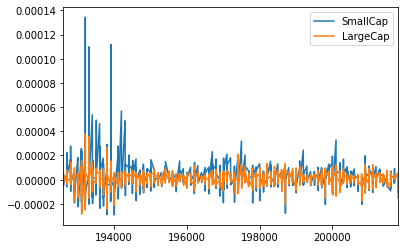

In [29]:
returns.plot.line()

We can see from the graph that the large cap is much less volatile than the small cap. We can compute the monthly volatility of the data as follows:

In [45]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

We can get the annualized volatilty as follows:

In [47]:
annualized_volatility = returns.std()*np.sqrt(12)
annualized_volatility

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [52]:
number_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/number_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [53]:
annualized_returns = (return_per_month+1)**12 - 1
annualized_returns

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

Now, we have the return as well as the risk, we can find the return to risk ratio.

In [55]:
annualized_returns/annualized_volatility

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

Instead of just looking at the annualized return per unit volatility, the Sharpe ratio gives us the excess returns over risk free rate. Example lets consider risk free rate = 3%

In [60]:
risk_free_rate = 0.03
excess_returns = annualized_returns - risk_free_rate
sharpe_ratio = excess_returns/annualized_volatility
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

Looking at the results, we can say that the small cap does give a slightly superior risk adjusted returns over large cap stocks. 

We can check if the same results follow when we consider the smallest 20% of stocks vs the largest 20% of stocks.

In [63]:
returns_20 = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header=0, index_col=0, parse_dates=True, na_values=-99.99
                     )
columns = ['Lo 20', 'Hi 20']
returns_20 = returns_20[columns]
returns_20 = returns_20/100
returns_20.columns = ['SmallCap20', 'LargeCap20']
returns_20.head()

,SmallCap20,LargeCap20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


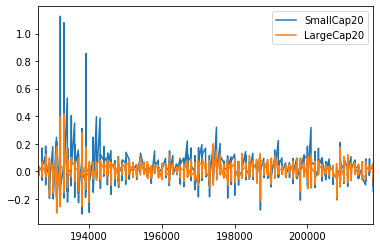

In [64]:
returns_20.plot.line()

In [71]:
return_per_month20 = (returns_20+1).prod()**(1/number_months) - 1
return_per_month20

SmallCap20    0.011860
LargeCap20    0.007859
dtype: float64

In [73]:
annualized_volatility20 = returns_20.std()*np.sqrt(12)
annualized_volatility20

SmallCap20    0.336701
LargeCap20    0.195116
dtype: float64

In [74]:
annualized_returns20 = (return_per_month20 + 1)**(12) - 1
excess_returns20 = annualized_returns20 - risk_free_rate
sharpe_ratio20 = excess_returns20/annualized_volatility20
sharpe_ratio20

SmallCap20    0.362271
LargeCap20    0.351023
dtype: float64

As we can see from the results, the conclusion is the same for 20% of high cap and low cap stocks as well. Even in this case, the lowest 20% of stocks give better returns than the highest 20% of the stocks.